<a href="https://colab.research.google.com/github/AzizYunez/APP_menu/blob/main/7_FFT_TiempoReal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada Discreta de Fourier - Análisis de Señales en Tiempo Real

La transformada discreta de Fourier permite realizar el análisis espectral de una señal. Nos lleva del espacio de tiempo discreto al espacio de frecuencias, donde podemos obtener información sobre las componentes frecuenciales predominantes de una señal. El desarrollo de este módulo tendrá el siguiente orden:

1. Definición Matemática de la Transformada Discreta de Fourier - Ejemplo en pequeña señal
2. Identificación Frecucencia Predominante en Señal Discreta
3. Identificación de Notas Musicales con Audio Real
4. Analisis Espectral en Tiempo  Real Usando Entrada de Micrófono

In [2]:
from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves

In [3]:
gn = [0, 1, 2, 3, 4] # Definimos una función en tiempo discreto
gk = fourier.fft(gn) # Calculamos la FFT
gk

array([10. -0.j        , -2.5+3.4409548j , -2.5+0.81229924j,
       -2.5-0.81229924j, -2.5-3.4409548j ])

In [4]:
M_gk = abs(gk)                   # Calculamos la Magnitud de la FFT
Ph_gk = np.angle(gk)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_gk)
print('Angle: ',Ph_gk*180/np.pi)

Magnitud:  [10.          4.25325404  2.62865556  2.62865556  4.25325404]
Angle:  [  -0.  126.  162. -162. -126.]


## 2. Identificación Frecucencia Predominante en Señal Discreta

Crearemos una señal compuesta por dos ondas sinusoidales de 60 Hz y 223 Hz. Agregaremos ruido a la señal compuesta y luego mediante la FFT identificaremos las frecuencias predominantes de la señal sintética

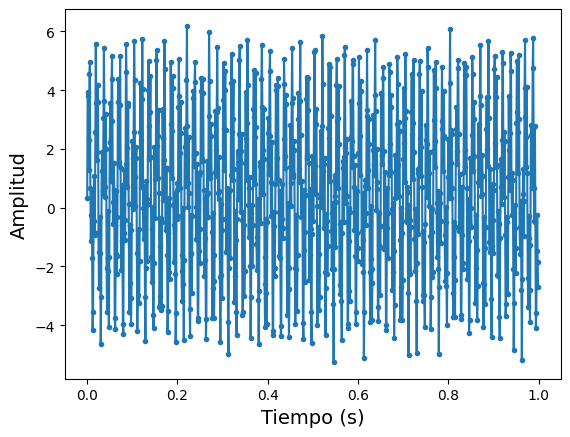

In [5]:
Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)
ruido = np.random.random(len(n))
x = 3*np.sin(w1*n)+2.3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

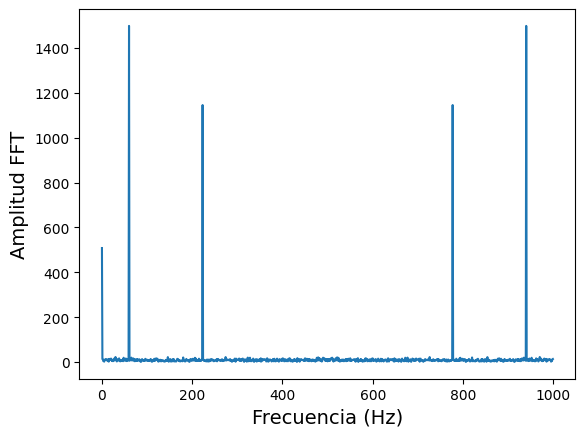

In [6]:
gk = fourier.fft(x)                             # Calculamos la FFT
M_gk = abs(gk)                                  # Calculamos la Magnitud de la FFT

F = Fs*np.arange(0, len(x))/len(x)              # Definimos el Vector de Frecuencias

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [8]:
filename='rec_SOL.wav'

Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
Audio_m = data[:,0]

L = len(Audio_m)                                      # Tomamos la longitud de la señal

n = np.arange(0,L)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal

plt.plot(n,Audio_m)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'rec_SOL.wav'

In [ ]:
Audio_m.shape

(91008,)

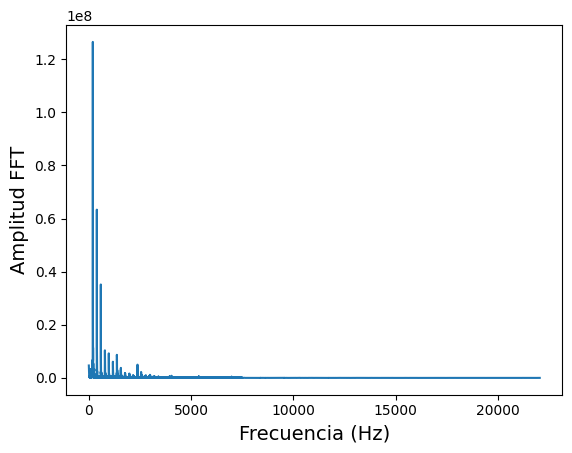

In [ ]:
gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [ ]:
Posm = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT

if F_fund > 128 and F_fund < 133:
    print("La nota es DO3, con frecuencia: ", F_fund)
elif F_fund > 144 and F_fund < 150:
    print("La nota es RE3, con frecuencia: ", F_fund)
elif F_fund > 162 and F_fund < 168:
    print("La nota es MI3, con frecuencia: ", F_fund)
elif F_fund > 172 and F_fund < 178:
    print("La nota es FA3, con frecuencia: ", F_fund)
elif F_fund > 193 and F_fund < 200:
    print("La nota es SOL3, con frecuencia: ", F_fund)
elif F_fund > 217 and F_fund < 223:
    print("La nota es LA3, con frecuencia: ", F_fund)
elif F_fund > 243 and F_fund < 250:
    print("La nota es SI3, con frecuencia: ", F_fund)
elif F_fund > 258 and F_fund < 265:
    print("La nota es DO4, con frecuencia: ", F_fund)
elif F_fund > 290 and F_fund < 297:
    print("La nota es RE4, con frecuencia: ", F_fund)
elif F_fund > 326 and F_fund < 333:
    print("La nota es MI4, con frecuencia: ", F_fund)
elif F_fund > 346 and F_fund < 352:
    print("La nota es FA4, con frecuencia: ", F_fund)
elif F_fund > 389 and F_fund < 395:
    print("La nota es SOL4, con frecuencia: ", F_fund)
elif F_fund > 437 and F_fund < 443:
    print("La nota es LA4, con frecuencia: ", F_fund)
elif F_fund > 490 and F_fund < 497:
    print("La nota es SI4, con frecuencia: ", F_fund)
else:
    print("Nota fuera del rango programado. Frecuencia detectada:", F_fund)


La nota es SOL3, con frecuencia:  [195.76740506]


In [ ]:
import matplotlib
import pyaudio as pa
import struct
import time

matplotlib.use('TkAgg')
#%matplotlib notebook

FRAMES = 1024*8                                   # Tamaño del paquete a procesar
FORMAT = pa.paInt16                               # Formato de lectura INT 16 bits
CHANNELS = 1
Fs = 44100                                        # Frecuencia de muestreo típica para audio

p = pa.PyAudio()

stream = p.open(                                  # Abrimos el canal de audio con los parámeteros de configuración
    format = FORMAT,
    channels = CHANNELS,
    rate = Fs,
    input=True,
    frames_per_buffer=FRAMES
)

## Creamos una gráfica con 2 subplots y configuramos los ejes

fig, (ax,ax1) = plt.subplots(2)

x_audio = np.arange(0,FRAMES,1)
x_fft = np.linspace(0, Fs, FRAMES)

line, = ax.plot(x_audio, np.random.rand(FRAMES),'r')
line_fft, = ax1.semilogx(x_fft, np.random.rand(FRAMES), 'b')

ax.set_ylim(-32500,32500)
ax.ser_xlim = (0,FRAMES)

Fmin = 1
Fmax = 5000
ax1.set_xlim(Fmin,Fmax)

fig.show()


F = (Fs/FRAMES)*np.arange(0,FRAMES//2)                 # Creamos el vector de frecuencia para encontrar la frecuencia dominante

while True:

    data = stream.read(FRAMES)                         # Leemos paquetes de longitud FRAMES
    dataInt = struct.unpack(str(FRAMES) + 'h', data)   # Convertimos los datos que se encuentran empaquetados en bytes

    line.set_ydata(dataInt)                            # Asignamos los datos a la curva de la variación temporal

    M_gk = abs(fourier.fft(dataInt)/FRAMES)            # Calculamos la FFT y la Magnitud de la FFT del paqute de datos


    ax1.set_ylim(0,np.max(M_gk+10))
    line_fft.set_ydata(M_gk)                           # Asigmanos la Magnitud de la FFT a la curva del espectro

    M_gk = M_gk[0:FRAMES//2]                           # Tomamos la mitad del espectro para encontrar la Frecuencia Dominante
    Posm = np.where(M_gk == np.max(M_gk))
    F_fund = F[Posm]                                   # Encontramos la frecuencia que corresponde con el máximo de M_gk

    print(int(F_fund))                                 # Imprimimos el valor de la frecuencia dominante

    fig.canvas.draw()
    fig.canvas.flush_events()


KeyboardInterrupt: 